# Overview of this notebook and main takeaways.

*This will be moved to GitHub later*<br>

This notebook analyses the LabelStudio output of the tweet from Alviina Alametsa. We look at the distribution types of argumentation, Average Sentiment Value, Average Botometer score.

Not much of a language analysis could be done as only one Hindi response was detected. While I would have loved to analyse the difference between Hindi tweets and non-Hindi tweets, the current data isn't sufficient to find anything interesting.<br>
Likewise, I cannot separate by timezone as all tweets appear to have the same timezone attached to them which makes it somewhat useless for analysis.

## Results
Here are the total number of tweets given a particular type of argument:<br>
* Delegitimization of foreign speakers - 44
* Appropriation of “decolonialize” narrative - 5
* Whataboutism - 12
* Alleged “ulterior motives” of the speaker - 5
* Questioning stature of the speaker (not widely followed) - 7
* Misogynistic/slut-shaming - 9
* Delegitimization as speaker may not be considered an  “expert” - 3
* In Favour - 11
* Unrecognisable - 17

Sentiment Scores:
* Average Sentiment of all tweets: -0.6371681415929203
* This value goes up to -0.75 when excluding unknown tweets. Hence for every 4 recognisable tweets, 3 were negative and 1 was positive.
* The Sentiments per language are available in the notebook but are rather uninteresting given the distribution (96 English, 1 Hindi, 16 Other languages)

Regression:
* An analysis was done on whether the number of likes, the number of replies, and the number of replies were significant in determining the sentiment.
* This returned an insignificant for the variables, but the constant was significant, so we know the the line of best fit doesn't begin at 0.
<br>
* Next an analysis was done on whether the sentiment affected the number of likes. This returned insignificant
* The same process but for sentiment affecting replies and retweets. Those also returned insignificant values.

Botometer Scores:
* A change to prior measurements, the ones taken here are on a scale from 0-1 rather than 0-5.
* There are multiple values given from the Botometer, so I worked with OverallEng and OverallUni.
* The mean for OverallEng is 0.2215929203539823.
* The mean for OverallUni is 0.20371681415929208. Seems like an ignorable difference.
* Now we can see the average score given that it is a negative sentiment. Those are as follows:
  * 0.23674698795180726 Average BotometerEng score of Negative Sentiment
  * 0.22445783132530114 Average BotometerUni score of Negative Sentiment
<br>
<br>
* The question is whether these deviations are significant. One way of testing this is the Z-score, where if it is greater than the absolute value of (+-1.96), then it is significant. Those are as follows:
  * Z score of Negative Sentiment Average (BotomterEng): 0.0827
  * Z score of Negative Sentiment Average (BotometerUni): 0.112
* Thus we conclude that the negative comments aren't significantly more bot like than the rest of the population.
* Doing a t-test of the Negative Sentiment subset against the whole population, the p value is also 0.506 (more than 0.05, thus insignificant)
<br>
<br>
Final Regression:
* The final task completed was to turn all the labels (argumentation types) into binary lists, and see whether they contribute to botometer scores (OverallEng only), to see if a certain type of argument exhibited particular bot like tendencies. The only value of significance was "In_Favour", with a negative value. Hence given that a tweet was in favour, it was less likely to be a bot.

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"/content/drive/MyDrive/TLS stuff/replies-alviinaalametsa-annotated-botometer.csv") #while this file shows the output for Alviina Alamesta, it should also 
#work for Larroutourou, but I did see that the LabelStudio tags were slightly different between the two
df.head()
#Our columns
Sentiment=df["sentiment"]
UserId=df["user_id"]
Language=df["language"]
#Our counters
Degitimization_Foreign=0
Appropriation_Decolonialize=0
Whataboutism=0
UlteriorMotives=0
QuestioningSpeakerFollow=0
Misogyny=0
Delegitimisation_Expert=0
Favour=0
Unknown=0
EnglishCounter=0
HindiCounter=0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
SentimentValue=0 #Counter of sentiment
SentimentList=[] #A new column for every nth tweet
for i in Sentiment: #Separation into individual tweet types
    if "Delegitimization of foreign speakers" in i:
        Degitimization_Foreign+=1
    elif "Appropriation of “decolonialize” narrative" in i:
        Appropriation_Decolonialize+=1
    elif "Whataboutism" in i:
        Whataboutism+=1
    elif "Alleged “ulterior motives” of the speaker" in i:
        UlteriorMotives+=1
    elif "Questioning stature of the speaker (not widely followed)" in i:
        QuestioningSpeakerFollow+=1
    elif "Misogynistic/slut-shaming" in i:
        Misogyny+=1
    elif "Unrecoganisable" in i:
        Unknown+=1
    elif "Delegitimization as speaker may not be considered an  “expert”" in i:
        Delegitimisation_Expert+=1
    elif "Favour" in i:
        Favour+=1
for i in Sentiment:
    if "Unrecoganisable" in i:
        SentimentList.append(0) #no sentiment value here to be added
    elif "Favour" in i:
        SentimentValue+=1 
        SentimentList.append(1)
    else:
        SentimentValue-=1 #thus a total for sentiment value without double or triple counting (in theory at least)
        SentimentList.append(-1)
        
    

In [ ]:
FinalList=[Degitimization_Foreign,Appropriation_Decolonialize,Whataboutism,
          UlteriorMotives,QuestioningSpeakerFollow,Misogyny,Delegitimisation_Expert,Favour,Unknown] #combine previous counters into one list
print(FinalList)

[44, 5, 12, 5, 7, 9, 3, 11, 17]


In [ ]:
#print(SentimentList)
Language_And_Sentiment=[]
EnglishSentiment=[]
HindiSentiment=[]
OtherSentiment=[]
for i, j in zip(SentimentList,Language): #with our new sentiment list, we can compare across languages
    Language_And_Sentiment.append([i,j])
for i in Language_And_Sentiment:
    if 'en' in i:
        EnglishSentiment.append(i[0])
        EnglishCounter+=1
    elif 'in' in i:
        HindiSentiment.append(i[0])
        HindiCounter+=1
    else:
        OtherSentiment.append(i[0])
print(np.average(EnglishSentiment),"Average English reply sentiment out of",len(EnglishSentiment),"replies")
print(np.average(HindiSentiment),"Average Hindi reply sentiment out of",len(HindiSentiment),"replies")
print(np.average(OtherSentiment),"Average other-language reply sentiment out of",len(OtherSentiment),"replies")
print(np.mean(SentimentList))

-0.7291666666666666 Average English reply sentiment out of 96 replies
-1.0 Average Hindi reply sentiment out of 1 replies
-0.0625 Average other-language reply sentiment out of 16 replies
-0.6371681415929203


In [ ]:
TotalResponses=len(Sentiment)-Unknown
#print(SentimentValue)
NetSentiment=SentimentValue/TotalResponses
NetSentiment #net sentiment of known tweet types

-0.75

In [ ]:
import statsmodels.api as sm
import seaborn as sns

A,B,C=df['nlikes'],df['nretweets'],df['nreplies']
X=[A,B,C]
def reg_m(y, x): #multivariable
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    model= sm.OLS(y, X)
    results=model.fit(cov_type='HC0') #heteroscedasticity robust (HC0)
    return results
print(reg_m(SentimentList, X).summary())
#running a regression on certain parameters

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.536
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.209
Time:                        13:57:32   Log-Likelihood:                -110.46
No. Observations:                 113   AIC:                             228.9
Df Residuals:                     109   BIC:                             239.8
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0231      0.210      0.110      0.9

In [ ]:
def Reg_m(y, x): #univaiable
    X = sm.add_constant(x)
    model= sm.OLS(y, X)
    results=model.fit(cov_type='HC0') #heteroscedasticity robust (HC0)
    return results
print(Reg_m(A, SentimentList).summary())

                            OLS Regression Results                            
Dep. Variable:                 nlikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2398
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.625
Time:                        14:08:01   Log-Likelihood:                -303.26
No. Observations:                 113   AIC:                             610.5
Df Residuals:                     111   BIC:                             616.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9996      0.372      2.684      0.0

In [ ]:
print(Reg_m(B, SentimentList).summary())

                            OLS Regression Results                            
Dep. Variable:              nretweets   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.298
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.257
Time:                        14:13:32   Log-Likelihood:                -105.10
No. Observations:                 113   AIC:                             214.2
Df Residuals:                     111   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.107      2.168      0.0

In [ ]:
print(Reg_m(C, SentimentList).summary())

                            OLS Regression Results                            
Dep. Variable:               nreplies   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.01057
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.918
Time:                        14:13:47   Log-Likelihood:                -1.3660
No. Observations:                 113   AIC:                             6.732
Df Residuals:                     111   BIC:                             12.19
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.031      1.499      0.1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


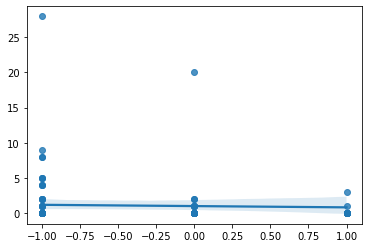

In [ ]:
sns.regplot(SentimentList,list(A))

In [ ]:
import matplotlib.pyplot as plt

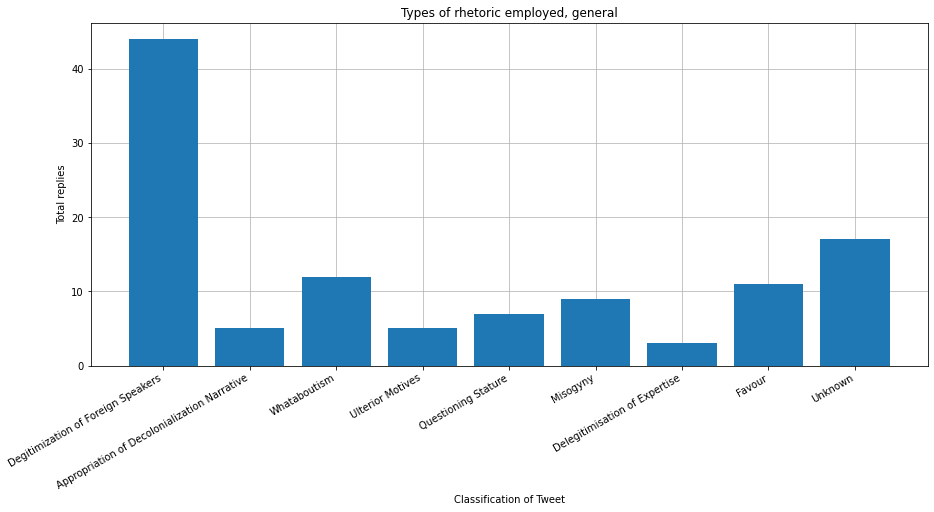

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
LabelsGeneral = X=['Degitimization of Foreign Speakers','Appropriation of Decolonialization Narrative','Whataboutism',
          'Ulterior Motives','Questioning Stature','Misogyny','Delegitimisation of Expertise','Favour','Unknown']
ax.bar(LabelsGeneral,FinalList)
ax.set_xlabel('Classification of Tweet')
ax.set_ylabel('Total replies')
ax.set_title('Types of rhetoric employed, general')
fig.autofmt_xdate()
plt.grid(animated=True,alpha=0.9)
ax.set_axisbelow(True)
plt.show()
plt.savefig('GENERAL RHETORIC.jpg', bbox_inches='tight', dpi=600)
#feel free to play around with visuals

In [ ]:
#print(df.head())
#There are multiple Botometer scores, I will test them OverallEng and OverallUni. These are scaled from 0-1
BotometerOverallEng=df["botometerOverallRawEng.score"]
BotometerOverallUni=df["botometerOverallRawUni.score"]
print(max(BotometerOverallEng))
#print(df.columns.values)


0.81
['id' 'conversation_id' 'created_at' 'date' 'timezone' 'place' 'tweet'
 'language' 'hashtags' 'cashtags' 'user_id' 'user_id_str' 'username'
 'name' 'day' 'hour' 'link' 'urls' 'photos' 'video' 'thumbnail' 'retweet'
 'nlikes' 'nreplies' 'nretweets' 'quote_url' 'search' 'near' 'geo'
 'source' 'user_rt_id' 'user_rt' 'retweet_id' 'reply_to' 'retweet_date'
 'translate' 'trans_src' 'trans_dest' 'sentiment' 'annotator'
 'annotation_id' 'updated_at' 'lead_time' 'botometerCapEng.score'
 'botometerCapUni.score' 'botometerOverallRawEng.score'
 'botometerOverallRawUni.score' 'botometerDisplayEng.score'
 'botometerDisplayUni.score']


In [ ]:
Mean_BotometerOverallEng=np.mean(BotometerOverallEng)
Mean_BotometerOverallUni=np.mean(BotometerOverallUni)
print("BotometerOverallEng mean:",Mean_BotometerOverallEng)
print("BotometerOverallUni mean:",Mean_BotometerOverallUni)

BotometerOverallEng mean: 0.2215929203539823
BotometerOverallUni mean: 0.20371681415929208


In [ ]:
df.columns.values
Timezone=df["timezone"]
for i in Timezone:
  #print(i)
  pass #how are they all from an identical timezone? Is this the timezone of the source gathering it?
  if i!=200:
    print(i) #Can't do an analysis by region then I suppose.
NegativeSentimentBotometerScoreEng=[]
NegativeSentimentBotometerScoreUni=[]

In [ ]:
for i,j,k in zip(SentimentList,BotometerOverallEng,BotometerOverallUni):
  if i==(-1):
   NegativeSentimentBotometerScoreEng.append(j) 
   NegativeSentimentBotometerScoreUni.append(k)
Mean_NegativeSentimentBotometerScoreEng=np.mean(NegativeSentimentBotometerScoreEng)
Mean_NegativeSentimentBotometerScoreUni=np.mean(NegativeSentimentBotometerScoreUni)
#These values are higher, but are they significantly higher?
print(Mean_NegativeSentimentBotometerScoreEng,"Average BotometerEng score of Negative Sentiment")
print(Mean_NegativeSentimentBotometerScoreUni,"Average BotometerUni score of Negative Sentiment")

0.23674698795180726 Average BotometerEng score of Negative Sentiment
0.22445783132530114 Average BotometerUni score of Negative Sentiment


In [ ]:
StDev_BotometerOverallEng=np.std(BotometerOverallEng)
StDev_BotometerOverallUni=np.std(BotometerOverallUni)
ZScore_NegativeSentimentBotometerScoreEng=(Mean_NegativeSentimentBotometerScoreEng-Mean_BotometerOverallEng)/StDev_BotometerOverallEng
print("Z score of Negative Sentiment Average (BotomterEng):",ZScore_NegativeSentimentBotometerScoreEng)
ZScore_NegativeSentimentBotometerScoreUni=(Mean_NegativeSentimentBotometerScoreUni-Mean_BotometerOverallUni)/StDev_BotometerOverallUni
print("Z score of Negative Sentiment Average (BotometerUni):",ZScore_NegativeSentimentBotometerScoreUni)
#Z over 1.96 is significant. This is very far from significant. Thus we conclude that a comment being negative has nothing to do with it being a bot account


Z score of Negative Sentiment Average (BotomterEng): 0.08269712353462302
Z score of Negative Sentiment Average (BotometerUni): 0.11215110906179529


In [ ]:
import scipy
print(scipy.stats.ttest_ind(BotometerOverallEng,NegativeSentimentBotometerScoreEng))

Ttest_indResult(statistic=-0.6641549525572567, pvalue=0.5071435926268235)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


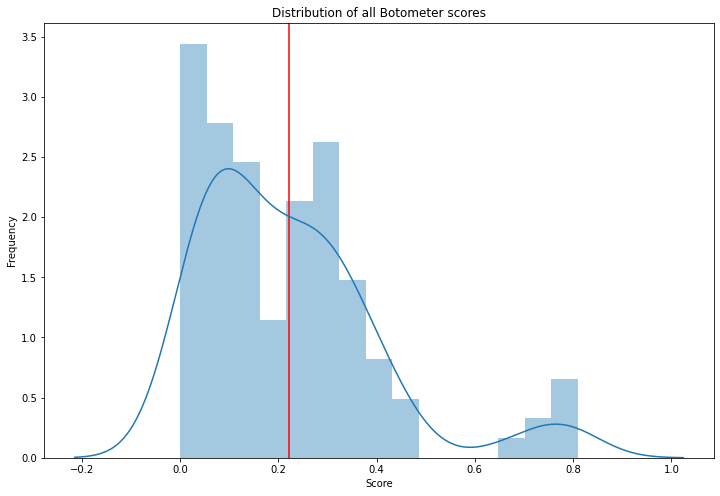

In [ ]:
BotometerOverallEng=np.array(BotometerOverallEng)
fig = plt.gcf()
plt.title("Distribution of all Botometer OverallEng scores");plt.xlabel("Score");plt.ylabel("Frequency")
fig.set_size_inches(12, 8)
plt.axvline(x=BotometerOverallEng.mean(),
            color='red')
sns.distplot(BotometerOverallEng,hist=True,kde=True,bins=15)
#fig.savefig('Name.jpg', bbox_inches='tight', dpi=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


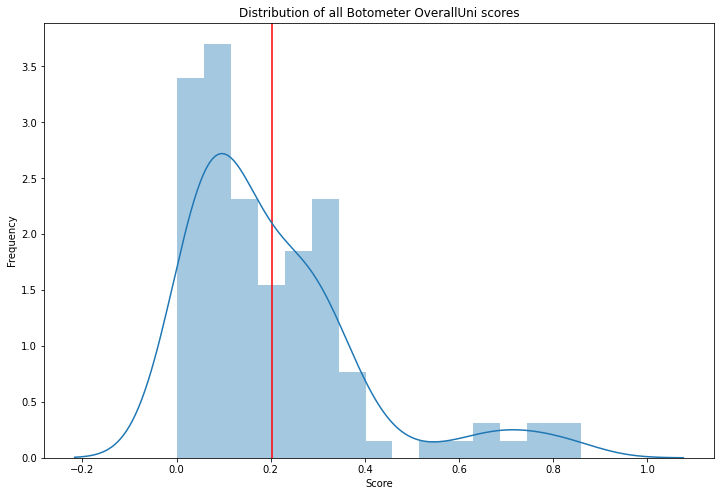

In [ ]:
BotometerOverallUni=np.array(BotometerOverallUni)
fig = plt.gcf()
plt.title("Distribution of all Botometer OverallUni scores");plt.xlabel("Score");plt.ylabel("Frequency")
fig.set_size_inches(12, 8)
plt.axvline(x=BotometerOverallUni.mean(),
            color='red')
sns.distplot(BotometerOverallUni,hist=True,kde=True,bins=15)
#fig.savefig('Name.jpg', bbox_inches='tight', dpi=200)

In [ ]:
Degitimization_Foreign_List=[] #We are now making binary lists instead of a simple counter.
Appropriation_Decolonialize_List=[]
Whataboutism_List=[]
UlteriorMotives_List=[]
QuestioningSpeakerFollow_List=[]
Misogyny_List=[]
Unknown_List=[]
Delegitimisation_Expert_List=[]
Favour_List=[]
for i in Sentiment: #Separation into individual tweet types
    if "Delegitimization of foreign speakers" in i:
        Degitimization_Foreign_List.append(1)
    else:
        Degitimization_Foreign_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Appropriation of “decolonialize” narrative" in i:
        Appropriation_Decolonialize_List.append(1)
    else:
        Appropriation_Decolonialize_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Whataboutism" in i:
        Whataboutism_List.append(1)
    else:
        Whataboutism_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Alleged “ulterior motives” of the speaker" in i:
        UlteriorMotives_List.append(1)
    else:
        UlteriorMotives_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Questioning stature of the speaker (not widely followed)" in i:
        QuestioningSpeakerFollow_List.append(1)
    else:
        QuestioningSpeakerFollow_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Misogynistic/slut-shaming" in i:
        Misogyny_List.append(1)
    else:
        Misogyny_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Unrecoganisable" in i:
        Unknown_List.append(1)
    else:
        Unknown_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Delegitimization as speaker may not be considered an  “expert”" in i:
        Delegitimisation_Expert_List.append(1)
    else:
        Delegitimisation_Expert_List.append(0)
for i in Sentiment: #Separation into individual tweet types
    if "Favour" in i:
        Favour_List.append(1)
    else:
        Favour_List.append(0)
Favour_List
"Favour"

'Favour'

In [ ]:
FinalList_List=[Degitimization_Foreign_List,Appropriation_Decolonialize_List,Whataboutism_List,
          UlteriorMotives_List,QuestioningSpeakerFollow_List,Misogyny_List,Delegitimisation_Expert_List,Favour_List,Unknown_List]
print(reg_m(BotometerOverallEng,FinalList_List).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     1.240
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.279
Time:                        14:54:14   Log-Likelihood:                 36.016
No. Observations:                 113   AIC:                            -52.03
Df Residuals:                     103   BIC:                            -24.76
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0377      0.063     -0.603      0.5

In [ ]:
def Reg_m_t_test(y, x): #univaiable
    X = sm.add_constant(x)
    model= sm.OLS(y, X)
    results=model.fit(cov_type='HC0') #heteroscedasticity robust (HC0)
    return results.t_test([1, 0])
ListNames=["Degitimization_Foreign_List","Appropriation_Decolonialize_List","Whataboutism_List",
          "UlteriorMotives_List","QuestioningSpeakerFollow_List","Misogyny_List","Delegitimisation_Expert_List","Favour_List","Unknown_List"]
for i,j in zip(FinalList_List, ListNames):
  print(j)
  print(Reg_m_t_test(BotometerOverallEng,i).summary()) #Everything seems very significant, thus I think this is a faulty method I'm using (not sure how though)

Degitimization_Foreign_List
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2052      0.022      9.257      0.000       0.162       0.249
Appropriation_Decolonialize_List
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2279      0.019     12.056      0.000       0.191       0.265
Whataboutism_List
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2087      0.018     11.749      0.0

In [ ]:
Botometer_In_Favour=[]
for i,j in zip(Favour_List,BotometerOverallEng):
  if i ==1:
    Botometer_In_Favour.append(j)
print(np.mean(Botometer_In_Favour))


0.18500000000000003


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


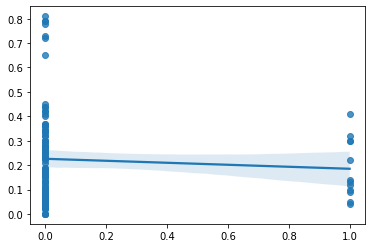

In [ ]:
sns.regplot(Favour_List,BotometerOverallEng)